In [1]:
import numpy as np
import sympy, scipy, cmath
from sympy import *
#from sympy import symbols
#from sympy.solvers.solveset import nonlinsolve
from scipy import sparse as sp
#from scipy import linalg as ln
from scipy import optimize as opt
from scipy.sparse import  coo_matrix as cmm
from matplotlib import pyplot as pp

In [217]:
m=0.5
mu=1.
muSC=20.
t=50.
W=1.
phi=np.pi*1

tL=5.
gamma=m/2*tL**2

def kBe(B): return cmath.sqrt(2*m*(mu-B))
def kBh(B): return cmath.sqrt(2*m*(mu+B))
def a(t): return 1/cmath.sqrt(2*m*t)

def g11e(B): 
    k=kBe(B)
    return -1j*m/k*(1-np.exp(2*1j*a(t)*k)+1j*np.exp(1j*W*k)/cmath.sin(W*k)*2*cmath.sin(a(t)*k)**2)
def g11h(B): 
    k=kBh(B)
    return 1j*m/k*(1-np.exp(2*1j*a(t)*k)+1j*np.exp(1j*W*k)/cmath.sin(W*k)*2*cmath.sin(a(t)*k)**2)
def g1Ne(B):
    k=kBe(B)
    return -1j*m/k*np.exp(1j*k*W)*(-1+np.exp(1j*2*k*a(t))+1j*2*cmath.sin(k*a(t))*cmath.sin(k*(W-a(t)))/cmath.sin(k*W))
def g1Nh(B):
    k=kBh(B)
    return 1j*m/k*np.exp(1j*k*W)*(-1+np.exp(1j*2*k*a(t))+1j*2*cmath.sin(k*a(t))*cmath.sin(k*(W-a(t)))/cmath.sin(k*W))

def det2G(B):
    return abs(1+2*gamma**2*(g11e(B)*g11h(B)+g1Ne(B)*g1Nh(B)*np.cos(phi)))/10000000

def det4G(B):
    a=g11e(B)
    b=g11h(B)
    c=g1Ne(B)
    d=g1Nh(B)
    return abs(gamma**4*(a**2*b**2+c**2*d**2-b**2*c**2-d**2*a**2)+2*gamma**2*(a*b+c*d*np.cos(phi))+1)/10000000

In [229]:
fkl=[det4G(B) for B in np.linspace(600,1000,1000000)]

[0, 1000000, 0.0, 1e-07]

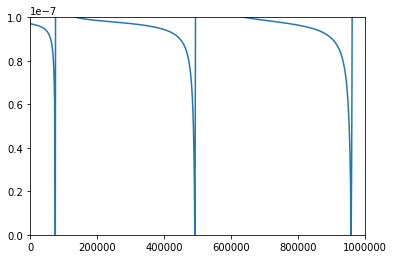

In [230]:
pp.plot(fkl)
pp.axis([0,1000000,0,.0000001])

In [239]:
Bmin=0
Bmax=5000.
Barray=[]
x0roots=np.linspace(Bmin+.1,Bmax,np.int((Bmax-Bmin)/10.))

for i in range(len(x0roots)):
    print(i)
    x0=x0roots[i]
    solekx=opt.fsolve(det4G,np.asarray(x0))
    if abs(det4G(solekx))>10**-10 or solekx<=0:
        solekx=[]
    solekx=np.ndarray.tolist(np.around(solekx,4))
    print(solekx)
    Barray.extend(solekx)
Barray=sorted(list(set(Barray)))

0
[]
1
[]
2
[]
3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
9
[]
10
[]
11
[]
12
[]
13
[]
14
[]
15
[]
16
[]
17
[]
18
[630.1397]
19
[796.8073]
20
[1191.0397]
21
[]
22
[]
23
[]
24
[]
25
[353.4815]
26
[353.4815]
27
[1191.0397]
28
[983.6144]
29
[]
30
[796.8073]
31
[796.8073]
32
[1191.0397]
33
[1191.0397]
34
[353.4815]
35
[353.4815]
36
[630.1397]
37
[796.8073]
38
[1191.0397]
39
[]
40
[2849.9742]
41
[2849.9742]
42
[3195.4004]
43
[]
44
[]
45
[8881.2475]
46
[5682.9638]
47
[]
48
[630.1397]
49
[]
50
[5219.4683]
51
[630.1397]
52
[630.1397]
53
[796.8075]
54
[]
55
[]
56
[630.1397]
57
[]
58
[]
59
[]
60
[]
61
[796.8073]
62
[796.8073]
63
[796.8073]
64
[983.6144]
65
[1418.868]
66
[]
67
[2849.9742]
68
[353.4815]
69
[]
70
[]
71
[]
72
[796.8073]
73
[796.8073]
74
[796.8073]
75
[630.1397]
76
[796.8073]
77
[796.8073]
78
[796.8073]
79
[796.8073]
80
[983.6144]
81
[983.6144]
82
[1191.0397]
83
[]
84
[2524.771]
85
[2219.4298]
86
[]
87
[2524.7709]
88
[2849.9742]
89
[2849.9742]
90
[983.6144]
91
[]
92
[796.8073]
93
[1191.0397]
94
[

In [247]:
Barray[9:10]=[]

In [248]:
Barray

[353.4815,
 630.1397,
 796.8075,
 983.6143,
 1191.0398,
 1418.868,
 1666.5165,
 1933.4354,
 2219.4298,
 2524.771,
 2849.9742,
 3195.4004,
 3561.0256,
 3946.5158,
 4351.485,
 4775.7555,
 5219.4683,
 5682.9638,
 6166.5209,
 6670.1645,
 8299.2533,
 8881.2475,
 9482.9881,
 9482.9882,
 10104.7029,
 10746.4355,
 11408.0285,
 13510.1885,
 14250.1509,
 15010.0322,
 15789.885,
 16589.5926,
 17408.9612,
 18247.8618,
 19984.4908,
 20882.5424,
 21800.5321,
 22738.3713,
 25669.654,
 26686.0256,
 32065.3289,
 34354.7648,
 37937.5817,
 45635.7321,
 51162.9277,
 55515.2291,
 57005.6695,
 64753.1735,
 76428.9422,
 90957.0298,
 92861.954,
 108811.3393,
 119420.9942]

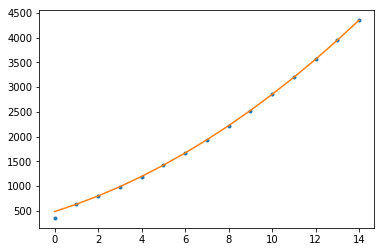

In [252]:
pp.plot(Barray[0:15],'.')
pp.plot([(n+7)**2*np.pi**2/2/m/W**2-mu for n in range(15)])
#pp.axis([-.1,2.1,0,300])

In [161]:
Barray.insert(7,1)